# The Machine Learning Project Lifecycle

<img src='assets/ml_lifecycle.png' alt='ml_lifecycle.png'>

In the final activity of this course, you will conduct a case study to apply everything you have learned about each stage of the machine learning (ML) project lifecycle. In particular, you will go through these stages:

* **Scoping** - to outline the project's objectives, as well as examine its feasibility and value.
* **Data** - to analyze the available data and determine how to improve its quality.
* **Modeling** - to evaluate the performance of your model and prioritize what to work on.
* **Deployment** - to plan for monitoring and maintaining your model in production.

By walking through each step of this iterative process, you will get hands-on experience in applying the principles and best practices needed to run a successful ML project.

<details>
  <summary><font size="3" color="green"><b>Click here for some important notes about the structure of this lab</b></font></summary>

  <br>
  This lab is longer than the previous labs because it goes through all the stages of the ML Project Lifecycle. The Data, Modeling, and Deployment sections will each take around 20 to 30 minutes to complete depending on how much time you spend on the exercises.

  <br>
  <br>
  
  If you want to take a break and come back later, we've created checkpoints where you can continue your progress without re-running the entire lab. Each stage has a `Setup` subsection that loads your previous results. For example, if you're already done with the `Data` section but need to step out for a while, you can click on `Modeling` below and run the cells under `Setup` to load the results you got from the `Data` section. Similarly, if you're done with `Data` and `Modeling`, you only need to click on `Deployment` below and run the `Setup` cells to load the resources needed for that section.
  
  * [Data](#Data)
  * [Modeling](#Modeling)
  * [Deployment](#Deployment)

  If you get stuck on the coding exercises, you can click the green font above the code cell to see hints or the solution.
</details>

## Case study

A small start-up developing a news-related application wants to classify news articles collected from several sources. One of their previous developers built a lightweight prototype using ML, but in their internal evaluation, they observed that it's not working as well as they expected. They have brought you in to troubleshoot their processes and deploy an improved beta version.

<a id='Scoping'></a>
## Scoping

Before diving into building the system, you'll want to first gather some details about the project. This information will help guide your decisions and set expectations for all the stakeholders. Here are the steps you might take:

* **Identify a business problem** - The company needs a news article classifier to integrate into the application they are building. You'll want to identify the relevant business metrics and determine if the technology can indeed help improve those metrics. In this case, an ML model can help scale up the company's operations as they get more news sources. Manual sorting can't keep up with the velocity of the data, and traditional rule-based algorithms may have given subpar results.

* **Brainstorm AI solutions** - This part has already been done for you. The previous developer settled on an AI solution that classified news articles using their title. In other projects, you may want to brainstorm a few different solutions to see which one addresses the business problem most effectively.

* **Assess the feasibility and value of potential solutions** - ML has demonstrated excellent performance in the area of text classification, so you're confident that this project can be successful. The company already has a prototype, but they want to build something better. Here, you can ask about the data collection process and the problems they encountered with the initial deployment. To assess project ethics, you can also ask if there is an official agreement with the news sources, and if users are linked directly to the publisher's website if they click on an article. Determine the company's stance on fake news and other types of misinformation. Make sure this is a project that moves humanity forward and aligns with your personal ethical values.

* **Determine milestones and budget for resourcing** - Identify the metrics for success and estimate the time and resources needed to carry out the project. Since the company is just starting to integrate ML into their workflow, they also want to better understand its capabilities. They have defined a simple model to predict an article's topic based only on its title. The initial model's results establish a baseline measure of performance as you improve the system. You committed 3 weeks to build and test a proof-of-concept based only on their existing prototype. This will help you estimate future timelines and have a feel for the resources you'll need to build a proper end-to-end project.

<a id='Data'></a>
## Data

Recall from the lectures that in **data-centric AI development**, the quality of the data is paramount. You will take a data-centric approach in this project by initially holding the model code fixed and iteratively improving the data to achieve better model performance.

### Setup

In [1]:
# Packages you will need in the Data Stage

import lab_utils
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In the Data stage, you  will look at the available data and see if it's sufficient for the application. The prototype files build by the previous developer are in the `E1` folder(short for Experiment 1), which has this structure:

* `data` - CSV files for the train and test sets
* `model` - a Tensorflow SavedModel that is trained on `train_data.csv` from the `data` folder
* `vocab` -  two text files
    * `labels.txt` - the 8 topics that the articles must be classified into
    * `vocabulary.txt` - the top 10,000 most common words in the article titles from `train_data.csv`
 
Run the code below to save the folder paths to variables so you can easily access them later. This code uses the `set_experiment_dirs()` helper function found in the `lab_utils.py` file. This utility file contains other functions that you will reuse several times in this notebook. Feel free to explore the functions in the said file to learn more about how they work.

In [2]:
# Working folder for the experiment
BASE_DIR = './E1'

# Get the subdirectories that contain the experiment files
data_dir, model_dir, vocab_dir = lab_utils.set_experiment_dirs(BASE_DIR)

print(
    f'base directory: {BASE_DIR}\n\n'
    f'data: {data_dir}\n'
    f'model: {model_dir}\n'
    f'vocab: {vocab_dir}\n'
)

base directory: ./E1

data: ./E1/data
model: ./E1/model
vocab: ./E1/vocab



Now, you will load the datasets into Pandas dataframes so you can preview and manipulate them later. Each dataset has 6 columns, but only 2 are used by the prototype model:

* `title` - The title of the article. This is the input to the model.
* `topic` - The category of the article. This is the label the model is trying to predict. It has 8 classes: entertainment, health, technology, world, business, sports, nation, and science.

The other 3 columns are only used in other parts of the company's app:
* `link`
* `domain`
* `published_date`

Run the cell below to preview the first 10 rows of the training set.

In [3]:
# Set the column width so you can see the entire length of the `title` column
pd.set_option('display.max_colwidth', None)

# Load the datasets into dataframes
train_df = pd.read_csv(f'{data_dir}/train_data.csv')
test_df = pd.read_csv(f'{data_dir}/test_data.csv')

# Preview the first 10 rows of the training set
train_df[:10]

,title,link,domain,published_date,topic
0,"NSW remains on COVID-19 high alert | The Star | Newcastle, NSW",https://www.newcastlestar.com.au/story/6878465/nsw-remains-on-covid-19-high-alert/?cs=7,newcastlestar.com.au,2020-08-13 17:32:28,HEALTH
1,Missing people: How does someone just disappear?,https://www.bbc.co.uk/news/uk-england-cambridgeshire-53648599,bbc.co.uk,2020-08-04 15:56:20,NATION
2,"An American Pickle review: In a dual role, Seth Rogen’s drama wins over comedy",https://www.polygon.com/2020/8/6/21357120/american-pickle-review-movie-seth-rogen-simon-rich-hbo-max,polygon.com,2020-08-06 15:58:22,ENTERTAINMENT
3,"Katie Spotz to Run 130 Miles to Bring Clean Water to Tanzania, Shares Testimony of Change",http://www.christianitydaily.com/articles/9647/20200807/katie-spotz-run-130-miles-bring-clean-water-tanzania-shares.htm,christianitydaily.com,2020-08-07 19:45:00,NATION
4,CDC Director Says This Fall Could Be ‘the Worst’ We’ve Ever Had Thanks to COVID-19,https://www.self.com/story/worst-fall-ever-covid,self.com,2020-08-13 19:37:52,HEALTH
5,Free water and electricity may be counterproductive – Economist,https://www.ghanaweb.com/GhanaHomePage/NewsArchive/Free-water-and-electricity-may-be-counterproductive-Economist-1031098,ghanaweb.com,2020-08-11 13:25:37,NATION
6,State places Tazewell County on COVID-19 warning list,https://week.com/2020/08/07/state-places-tazewell-county-on-covid-19-warning-list/,week.com,2020-08-07 18:00:24,HEALTH
7,Over 100 people quarantined in Mississippi school district after several test positive for coronavirus,https://www.nbcnews.com/news/us-news/over-100-people-quarantined-mississippi-school-district-after-several-test-n1236012,nbcnews.com,2020-08-06 16:35:00,NATION
8,How global warming is wiping out Africa's oldest baobab trees,http://www.capetalk.co.za/articles/307750/how-global-warming-is-wiping-out-africa-s-oldest-baobab-trees,capetalk.co.za,2018-06-14 12:00:53,WORLD
9,"Delay routine dental checkups, WHO urges, until COVID risk is known","https://www.thepeninsulaqatar.com/article/11/08/2020/Delay-routine-dental-checkups,-WHO-urges,-until-COVID-risk-is-known",thepeninsulaqatar.com,2020-08-11 17:13:00,HEALTH


### Define the Data

Earlier in this course, you learned that preparing the data effectively is key to good model performance. If the human labellers employed to provide the ground truth for the dataset were working with ambiguous labelling instructions, they may produce inconsistent labels. These inconsistent labels make it harder for the learning algorithm to understand the relationship between the inputs and outputs.

Given the information you have so far about this project, write down your questions or observations about the data (particularly the input feature and label). Where might there be sources of ambiguity? What changes could help your model make good predictions? Use the code cell below to explore the datasets. If you see something wrong, don't fix it just yet. You'll have the chance to make any fixes later in the project.

In [4]:
# You can use this cell to explore the dataframes. The cell below
# gets the titles and topics. Feel free to run other commands.
train_df[['title', 'topic']]

,title,topic
0,"NSW remains on COVID-19 high alert | The Star | Newcastle, NSW",HEALTH
1,Missing people: How does someone just disappear?,NATION
2,"An American Pickle review: In a dual role, Seth Rogen’s drama wins over comedy",ENTERTAINMENT
3,"Katie Spotz to Run 130 Miles to Bring Clean Water to Tanzania, Shares Testimony of Change",NATION
4,CDC Director Says This Fall Could Be ‘the Worst’ We’ve Ever Had Thanks to COVID-19,HEALTH
...,...,...
84370,Apple fires back at Epic: ‘We won’t make an exception’,TECHNOLOGY
84371,Actress Jessica Marais mourns loss of mother Karen,ENTERTAINMENT
84372,Google delays Chrome web apps drop-dead date until mid-2022,TECHNOLOGY
84373,"Liverpool evening headlines as Firmino scouted by Barcelona legend, Fabinho hails special success",SPORTS


<br>
<br>

👉 **EXERCISE:** Another thing you can try is to get a few rows and label them yourself. You can just write them on a piece of paper or a text file on your computer. This can help you develop some intuition regarding the data. You can run the cell below to get 10 titles with the labels hidden. Try classifying them manually and see if it matches those in the topic column (uncomment the 2nd line to see it). Again, the 8 classes you can choose from are: entertainment, health, technology, world, business, sports, nation, and science.

When you're done, you can compare your manual labels to those already in the dataset. If you found some mismatches, think about why that is. Perhaps you'll get some insight on how to carry out the data collection, and clarify the labelling process in the future to avoid inconsistencies.

In [7]:
# EXERCISE: print 10 titles and manually label them
# NOTE: Please do not overwrite the dataframe. Type your answers in a text file or write them on scrap paper

# Indices of the dataframe to use
start_index = 30
end_index = 40

# Sample titles to label
train_df[['title']][start_index:end_index]

# world, health, entertainment, entertainment ,health, technology, technology, business, technology, world
# # When you're done, uncomment the next line to see the 'true' labels 
train_df[['title', 'topic']][start_index:end_index]

,title,topic
30,"28% Fall in Mumbai's Home Isolation Cases, 62% Drop in Institutional Quarantine as Covid Curve Plateaus",NATION
31,Sniffer dogs begin trials to detect Covid,HEALTH
32,Seth Rogen says Marvel blockbusters make it difficult for comedy films,ENTERTAINMENT
33,"Farewell to Pete Way, the debauched bassist with a frontman's swagger",ENTERTAINMENT
34,Poo detectives on the COVID-19 frontline,HEALTH
35,Fortnite maker challenges Apple and Google's app store rules through direct-payment discounts,TECHNOLOGY
36,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,BUSINESS
37,Forex auction bolsters productive sector,NATION
38,Intel Tiger Lake could outrun AMD Ryzen 4000 in single-core performance,TECHNOLOGY
39,Rappi delivery workers in Colombia's Bogota strike over conditions,TECHNOLOGY


<br>
<br>

When you're done visually inspecting the data and writing down your thoughts, you can click on the green text below to see some example questions you may want to ask given this type of dataset.

<details>
  <summary><font size="2" color="green"><b>Click here for some example questions about the dataset</b></font></summary>
  
  * <i>How were the labels determined? How many labellers were involved and how were their outputs aggregated? What is the inter-rater reliability?
  * <i>How is each topic defined? For example, how are Science articles different from Technology ones?
  * <i>Can any of the other 3 unused columns be used as a predictive feature in the model?
  * <i>Is the article's title really enough for this application? If I could collect data again, what other predictive features would I want to have in order to generate more consistent labels?
  * <i>Will it help accuracy to add a new topic, or to merge two overlapping topics?
  
</details>

You don't have to address your questions right away. For some questions, like whether you can collect more data, you may not be able to get an answer easily. For now, continue to the next section to gather more insights.

### Establish a Baseline

Establishing a performance baseline early on allows you to better understand whether your updated model is an improvement, and if so, by how much. You already saw some ways to establish a baseline in the lectures. For this project, you will use the performance of the company's existing prototype as your baseline. 

The team can't find the previous metrics (it seems the previous developer left in a hurry), so you'll have to calculate them yourself. You will want to load the model and feed the test data. The model is built in Tensorflow, so you will use its API in this section.

In [8]:
# Load the model
model = tf.keras.models.load_model(model_dir)

# Show the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 24)            240000    
                                                                 
 dense_2 (Dense)             (None, 20, 24)            600       
                                                                 
 flatten_1 (Flatten)         (None, 480)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 3848      
                                                                 
Total params: 244448 (954.88 KB)
Trainable params: 244448 (954.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<br>
<br>

As you can see, the model architecture is relatively simple, mainly using an Embedding and Dense layer to classify the text. It's also lightweight with only about 240k parameters. You can also check the optimizer, loss, and metrics used. The output below shows `Adam`, `sparse_categorical_crossentropy` and `sparse_categorical_accuracy`, respectively.

In [9]:
# Get info about compiling the model
model.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': False,
   'is_legacy_optimizer': False,
   'learning_rate': 0.0010000000474974513,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': {'module': 'builtins',
  'class_name': 'function',
  'config': 'sparse_categorical_crossentropy',
  'registered_name': 'function'},
 'metrics': [[{'module': 'keras.metrics',
    'class_name': 'MeanMetricWrapper',
    'config': {'name': 'sparse_categorical_accuracy',
     'dtype': 'float32',
     'fn': {'module': 'builtins',
      'class_name': 'function',
      'config': 'sparse_categorical_accuracy',
      'registered_name': 'function'}},
    'registered_name': None}]],
 'loss_weights': None,
 'weig

<br>
<br>

You can use the model's `evaluate()` method to get its accuracy given the test data. However, the `test_df` dataframe still uses strings for both the input features (`test_df['title']`) and labels (`test_df['topic']`). The model can only consume numbers so you need to transform the strings into such. You can convert the news titles to integer sequences, and the labels to integers. The files in the `vocab_dir` can help with that.

First, you can use a [StringLookup()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup) layer like below to convert the labels to numerical indices.

In [10]:
# Create a lookup list for the labels
topic_lookup = tf.keras.layers.StringLookup(vocabulary=f'{vocab_dir}/labels.txt', num_oov_indices=0)

# Check the list of labels
topic_lookup.get_vocabulary()

['ENTERTAINMENT',
 'HEALTH',
 'TECHNOLOGY',
 'WORLD',
 'BUSINESS',
 'SPORTS',
 'NATION',
 'SCIENCE']

Next, to convert the string titles to numeric features, you'll need to tokenize them and generate integer sequences for each title. This can be done with a [TextVectorization()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) layer that uses the `vocabulary.txt` file in `vocab_dir`. It contains the top 10,000 commonly used words of the training set. The team already established that titles rarely have more than 20 words, so anything after that can be dropped. 

You can create the layer given the settings above as shown here:

In [11]:
# Title length and vocabulary size used by the team for the prototype
MAX_LENGTH = 20
VOCAB_SIZE = 10000

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Load the vocabulary file
title_preprocessor.load_assets(vocab_dir)

# Check the vocabulary size
print(f'vocabulary size: {title_preprocessor.vocabulary_size()}')

# Get a sample title
sample_title = train_df['title'][10]

# Sample title in string format
print(f"sample text: {sample_title}")

# Sample title represented as an integer sequence
print(f"sample text (preprocessed): {title_preprocessor(sample_title)}")

vocabulary size: 10000
sample text: Dengue fever cases in Laos rise to 4256
sample text (preprocessed): [4040 1979   30    2 9339  282    3    1    0    0    0    0    0    0
    0    0    0    0    0    0]


<br>
<br>

You can then get the evaluation metrics by running the code below. We provided a `df_to_tfdata` utility so you can convert dataframes to a `tf.data.Dataset` that has integer sequences given the `title_preprocessor` and `topic_lookup` layers you just created.

In [12]:
# Convert the test dataframe to a tf dataset
test_ds = lab_utils.df_to_tfdata(test_df, topic_lookup, title_preprocessor)

# Get the metrics
model.evaluate(test_ds)

763/763 [==============================] - 1s 1ms/step - loss: 1.0202 - sparse_categorical_accuracy: 0.7778


[1.0201756954193115, 0.7778187394142151]

[SparseCategoricalAccuracy()](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy) measures how often the predictions match integer labels. As shown above, the current model has 78% accuracy across all rows in the test dataset. You'll examine and build upon this in the next steps.

It's best to have some method to track your experiments as you advance through a project. It can be as simple as a text file that tracks important metrics and points to relevant directories. You can use the `experiment-tracker.csv` file in the file explorer on the left to write the results (Right Click and Select `Open With` --> `Editor` to make changes).

### Label and Organize Data

You just made a quick and dirty run-through of the prototype files and are able to measure the current model's performance. However, following the principles of **data-centric AI development**, you'd like to check if the data is well-organized before you do more experiments.

#### Data Pipeline

Being mindful of the steps that your data goes through before it reaches the model will help ensure replicability of your results and avoid erratic data transformations when you push the model to production.

Taking extensive notes about your experiments helps keep track of these steps as your pipeline becomes more complex. You can start by listing the steps from raw data to predictions, creating a flowchart like the diagram below. Then, add more details about each step (e.g. locations of the vocabulary files, etc) to record important aspects of your pipeline.

<center><img src='assets/pipeline_diagram.png' alt='pipeline_diagram.png'></center>


#### Create a balanced train/dev/test split

Another thing you can look at is the data splits. You learned in the lectures that it's best for small datasets to have a balanced split between all categories across the train, dev, and test sets.

The next two cells will show the percentage of each category in the train and test sets below using the `value_counts()` method.

In [13]:
# Print the percentage of each class in the train set
train_df.topic.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

topic
BUSINESS         13.2%
ENTERTAINMENT    14.1%
HEALTH           15.1%
NATION           13.2%
SCIENCE           0.7%
SPORTS           13.6%
TECHNOLOGY       15.3%
WORLD            14.8%
Name: proportion, dtype: object

In [14]:
# Print the percentage of each class in the test set
test_df.topic.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

topic
BUSINESS         15.9%
ENTERTAINMENT    12.7%
HEALTH            9.3%
NATION           15.9%
SCIENCE          13.2%
SPORTS           14.3%
TECHNOLOGY        8.6%
WORLD            10.1%
Name: proportion, dtype: object

As you can see, the percentage of each class is not the same between the train and test sets. The most extreme case is the `SCIENCE` category, where there are a lot more examples in the test set compared with the training set. Because of this imbalance, the learning algorithm might not find a lot of patterns for the science-related titles and will likely underperform compared to the rest of the topics.

One strategy you can use to get a better balance between the topics is to recombine the train and test sets into one pool, then split them again in a more balanced way. You'll try that approach in the exercise below.

👉 **EXERCISE:** Combine the train and test dataframes you've been using, and produce a balanced split of the `topic` column for three datasets:

* train_df - 60% of the combined datasets
* dev_df - 20%
* test_df - 20%

Notice that you will now have a dev set, whereas the previous experiment only has train and test sets. You will use this to monitor the validation accuracy when you retrain your models.

<details>
  <summary><font size="2" color="green"><b>Click here for hints</b></font></summary>
    
  * Refer to the Week 2 ungraded lab and see how to produce balanced splits given a dataframe column name.
  * You will use an argument of the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function
    
  <details>
    <summary><font size="2" color="green"><b>Click here for the solution</b></font></summary>
    <br>
      
```
      
    # Load the train and test sets
    train_df = pd.read_csv(f'{data_dir}/train_data.csv')
    test_df = pd.read_csv(f'{data_dir}/test_data.csv')
    
    # Combine the two datasets. Set ignore_index to False.
    combined_df = pd.concat([train_df,test_df], ignore_index=True)
    
    # Split the combined dataset to 60% train, 20% dev, and 20% test set. Produce a balanced split along the `topic` column.
    train_df, test_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df['topic'])
    train_df, dev_df = train_test_split(train_df, test_size=0.25, stratify=train_df['topic'])
```

  </details>
</details>

In [15]:
# EXERCISE

# Load the train and test sets
train_df = pd.read_csv(f'{data_dir}/train_data.csv')
test_df = pd.read_csv(f'{data_dir}/test_data.csv')

# Combine the two datasets. Set ignore_index to False.
combined_df = pd.concat([train_df,test_df], ignore_index=False)

### START CODE HERE ###

# Split the combined dataset to 60% train, 20% dev, and 20% test set. Produce a balanced split along the `topic` column.
train_df, test_df =  train_test_split(combined_df, test_size=0.2, stratify=combined_df['topic']) 
train_df, dev_df = train_test_split(train_df, test_size=0.2, stratify=train_df['topic']) 

### END CODE HERE

👉 **EXERCISE:** Show the percentage of each topic for the train, dev, and test sets. You should see this output for all three sets if you did the data splits correctly:

```
topic
BUSINESS         13.8%
ENTERTAINMENT    13.8%
HEALTH           13.8%
NATION           13.8%
SCIENCE           3.5%
SPORTS           13.8%
TECHNOLOGY       13.8%
WORLD            13.8%
Name: proportion, dtype: object
```

<details>
  <summary><font size="2" color="green"><b>Click here for hints</b></font></summary>
    * You can use the same code in the previous cells when you only had a train and test set.
    <br>
    <br>
  <details>
    <summary><font size="2" color="green"><b>Click here for the solution</b></font></summary>
    <br>

```
# Print the percentage of each class in the train set
train_df.topic.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

# Print the percentage of each class in the dev set
dev_df.topic.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

# Print the percentage of each class in the test set
test_df.topic.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'
```
      
  </details>
</details>

In [16]:
# EXERCISE: Print the percentage of each class in the train set

### START CODE HERE ###
train_df.topic.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'
### END CODE HERE ###

topic
BUSINESS         13.8%
ENTERTAINMENT    13.8%
HEALTH           13.8%
NATION           13.8%
SCIENCE           3.5%
SPORTS           13.8%
TECHNOLOGY       13.8%
WORLD            13.8%
Name: proportion, dtype: object

In [17]:
# EXERCISE: Print the percentage of each class in the dev set

### START CODE HERE ###
dev_df.topic.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'
### END CODE HERE ###

topic
BUSINESS         13.8%
ENTERTAINMENT    13.8%
HEALTH           13.8%
NATION           13.8%
SCIENCE           3.5%
SPORTS           13.8%
TECHNOLOGY       13.8%
WORLD            13.8%
Name: proportion, dtype: object

In [18]:
# EXERCISE: Print the percentage of each class in the test set

### START CODE HERE ###
test_df.topic.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'
### END CODE HERE ###

topic
BUSINESS         13.8%
ENTERTAINMENT    13.8%
HEALTH           13.8%
NATION           13.8%
SCIENCE           3.5%
SPORTS           13.8%
TECHNOLOGY       13.8%
WORLD            13.8%
Name: proportion, dtype: object

One thing to note here is that there are fewer science articles in the dataset compared with the rest of the topics. It's not uncommon to see this imbalance in practice. For example, if you're working on medical diagnosis with image datasets, you might have a lot more negative examples (i.e. healthy patients) than positive ones. If you have the time and resources, you can try to find more data or create synthetic data to augment the examples in this category. If not, you will have to pay attention to the metrics on this category when evaluating your model, which you will do later in this project.

Since you're doing a quick iteration, you will skip augmenting the data for now and use the splits above for the Modeling stage. It's a good idea to have a backup of the datasets so you can track which ones are used when you run an experiment.

You'll create a new directory `E2` (meaning "Experiment 2") to track this second iteration of the data and model.

In [19]:
# Set the base directory for the second experiment
BASE_DIR = './E2'

# Set the subdirectories that will contain the experiment files
data_dir, model_dir, vocab_dir = lab_utils.set_experiment_dirs(BASE_DIR)

# Save the datasets
lab_utils.save_data(train_df, data_dir, 'train_data.csv')
lab_utils.save_data(dev_df, data_dir, 'dev_data.csv')
lab_utils.save_data(test_df, data_dir, 'test_data.csv')

# Save the labels
lab_utils.save_labels(topic_lookup, vocab_dir)

<a id='Modeling'></a>
## Modeling

In the Modeling stage, you will select a model to learn from your data. You will evaluate its performance and perform error analysis to know how it can be improved. As a reminder, we are now here in the product lifecyle:

<img src='assets/ml_lifecycle_modeling.png' alt='ml_lifecycle_modeling.png'>

### Setup

In [20]:
import lab_utils
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Working folder for the experiment
BASE_DIR = './E1'

# Get the subdirectories that contain the experiment files
_, model_dir, _ = lab_utils.set_experiment_dirs(BASE_DIR)

# Load the model
model = tf.keras.models.load_model(model_dir)

# Working folder for the experiment
BASE_DIR = './E2'

# Title length and vocabulary size used by the team for the prototype
MAX_LENGTH = 20
VOCAB_SIZE = 10000

# Get the subdirectories that contain the experiment files
data_dir, model_dir, vocab_dir = lab_utils.set_experiment_dirs(BASE_DIR)

# Load the train and test sets
train_df = pd.read_csv(f'{data_dir}/train_data.csv')
dev_df = pd.read_csv(f'{data_dir}/dev_data.csv')
test_df = pd.read_csv(f'{data_dir}/test_data.csv')

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Create a lookup list for the labels
topic_lookup = tf.keras.layers.StringLookup(vocabulary=f'{vocab_dir}/labels.txt', num_oov_indices=0)

### Select and train the model

Since you're practicing **data-centric AI development**, you want to first do a quick analysis of the prototype model with your improved dataset before making changes to the model. You will use the same model architecture and feed in the datasets you generated above. However, you can't do that right away because the model you loaded earlier was trained on the imbalanced split of the topics.

You will first need to update your title preprocessor with a new vocabulary that represents the new training set.

In [21]:
# Extract the titles from the new training set
train_inputs = train_df['title']

# Generate a new vocabulary
title_preprocessor.adapt(train_inputs)

# Save the new vocabulary
lab_utils.save_vocab(title_preprocessor, vocab_dir)

You can now train and evaluate the model with the new datasets. You can instantiate a new one with the same architecture or in this case, reinitialize the weights of an existing model so you can train from scratch. There's a `model_reset_weights()` helper function in `lab_utils` that will work for the simple prototype model.

This training should take about 1 minute to complete.

In [22]:
NUM_EPOCHS = 5

# Convert the string datasets to Tensorflow datasets
train_ds = lab_utils.df_to_tfdata(train_df, topic_lookup, title_preprocessor, shuffle=True)
dev_ds = lab_utils.df_to_tfdata(dev_df, topic_lookup, title_preprocessor)
test_ds = lab_utils.df_to_tfdata(test_df, topic_lookup, title_preprocessor)

# Reset the model weights
model = lab_utils.model_reset_weights(model)

# Train the model. Use the dev set to check if your model is overfitting.
model.fit(train_ds, epochs=NUM_EPOCHS, validation_data=dev_ds, verbose=1)

Epoch 1/5
2176/2176 [==============================] - 12s 5ms/step - loss: 0.8797 - sparse_categorical_accuracy: 0.6845 - val_loss: 0.5647 - val_sparse_categorical_accuracy: 0.8104
Epoch 2/5
2176/2176 [==============================] - 11s 5ms/step - loss: 0.4430 - sparse_categorical_accuracy: 0.8464 - val_loss: 0.5287 - val_sparse_categorical_accuracy: 0.8252
Epoch 3/5
2176/2176 [==============================] - 10s 5ms/step - loss: 0.3513 - sparse_categorical_accuracy: 0.8787 - val_loss: 0.5522 - val_sparse_categorical_accuracy: 0.8223
Epoch 4/5
2176/2176 [==============================] - 10s 5ms/step - loss: 0.2923 - sparse_categorical_accuracy: 0.9002 - val_loss: 0.5914 - val_sparse_categorical_accuracy: 0.8199
Epoch 5/5
2176/2176 [==============================] - 10s 5ms/step - loss: 0.2432 - sparse_categorical_accuracy: 0.9183 - val_loss: 0.6425 - val_sparse_categorical_accuracy: 0.8169


After training, you can evaluate the model with the test set and log the results in the `experiment-tracker.csv` file. You should also save the model in the `E2` folder as a backup.

In [23]:
# Compute the loss and metrics
model.evaluate(test_ds)

680/680 [==============================] - 1s 1ms/step - loss: 0.6318 - sparse_categorical_accuracy: 0.8138


[0.631815493106842, 0.8137899041175842]

In [24]:
# Save the model
model.save(model_dir)

INFO:tensorflow:Assets written to: ./E2/model/assets


INFO:tensorflow:Assets written to: ./E2/model/assets


Taking a look at the model performance, you'll notice that the overall accuracy has improved from about 78% to about 81% just from the changes you made to the dataset already. But is this accuracy all it seems? In the next section, you'll examine this accuracy more closely based on slices of the data.

### Perform Error Analysis

The first iteration of your model will likely underperform and you will need to make adjustments to make it better. Error analysis helps you determine which part of the process you need to tweak to give the biggest improvement. Likewise, it helps you avoid focusing on parts that do not greatly affect the results.


#### Prioritizing What to Work On

Looking at the performance of your model on different categories of the data will help you decide how to improve its performance. In this case, you will evaluate the model on each of the 8 classes it's trying to predict.

In [25]:
# Get the list of topics
topics = topic_lookup.get_vocabulary()

# Evaluate the model's performance for each topic
lab_utils.print_metric_per_topic(dev_df, topics, topic_lookup, title_preprocessor, model)

ACCURACY PER TOPIC:

ENTERTAINMENT: 84.29 
HEALTH: 82.71 
TECHNOLOGY: 86.96 
WORLD: 65.13 
BUSINESS: 100.00 
SPORTS: 88.83 
NATION: 65.46 
SCIENCE: 75.50 


From the results, you can check which ones stand out. If you have a baseline such as human-level performance (HLP), you can measure how far each category is from that value, then focus your efforts on the category that will bring the biggest overall improvement.

On the other hand, this analysis can also help you spot errors. You might notice that performance on the `BUSINESS` topic seems suspiciously high compared to the rest. See if you can find why that is. 

👉 **EXERCISE:** Use the code cell below to extract the business articles and investigate the input features.

<details>
  <summary><font size="2" color="green"><b>Click here for hints</b></font></summary>
    * This will only take 1 line. Print the `train_df` rows that only has the topic equal to `BUSINESS`
    <br>
    <br>
  <details>
    <summary><font size="2" color="green"><b>Click here for the solution</b></font></summary>
    <br>

```
# filter the training dataframe's business articles
train_df[train_df.topic=='BUSINESS']
```
      
  </details>
</details>

In [31]:
# EXERCISE: 

### START CODE HERE

# filter the training dataframe's business articles
train_df.loc[train_df['topic'] == 'BUSINESS', 'title']

### END CODE HERE

9        Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
17       Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
46       Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
47       Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
55       Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
                                           ...                                   
69545    Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
69560    Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
69587    Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
69597    Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
69606    Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story
Name: title, Length: 9600, dtype: object

<br>
<br>

You might have noticed that the titles for all articles are the same: `"Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story"`. The model only learned this pattern, so it will likely not generalize well when real-world business-related titles come in. 

After some investigation, you find out that the previous developer accidentally overwrote the columns while fixing a character encoding. Luckily, there is a backup file which contains the original values. You can now procede with a new experiment using the correct values. To do so, generate train, dev, and test sets again and save these datasets to a folder named `E3`.

In [32]:
# Set the experiment folder
BASE_DIR = './E3'

# Set the subdirectories that will contain the experiment files
data_dir, model_dir, vocab_dir = lab_utils.set_experiment_dirs(BASE_DIR)

# Load the backup CSV
combined_df = pd.read_csv(f'./.backup.csv')

# Generate train, dev, and test sets as you did before.
train_df, test_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df['topic'])
train_df, dev_df = train_test_split(train_df, test_size=0.25, stratify=train_df['topic'])

# Save the datasets under the E3 folder
lab_utils.save_data(train_df, data_dir, 'train_data.csv')
lab_utils.save_data(dev_df, data_dir, 'dev_data.csv')
lab_utils.save_data(test_df, data_dir, 'test_data.csv')

You will also need to update the title preprocessor and generate a new vocabulary. Do this in the cell below and save the new vocabulary in the E3 folder.

👉 **EXERCISE:** Use the code cell below to generate a vocabulary based on the training set. Save the vocabulary in the `vocab_dir` folder.

<details>
  <summary><font size="2" color="green"><b>Click here for hints</b></font></summary>
    * Get the titles from the train_df.
    * Use the `adapt()` method of the `title_preprocessor` to generate the vocabulary.
    * Use the `save_vocab()` utility from `lab_utils` to save the vocabulary.
    <br>
    <br>
  <details>
    <summary><font size="2" color="green"><b>Click here for the solution</b></font></summary>
    <br>

```
# Generate a new vocabulary based on the new training set
train_inputs = train_df['title']
title_preprocessor.adapt(train_inputs)

# Save the new vocabulary and labels
lab_utils.save_vocab(title_preprocessor, vocab_dir)
lab_utils.save_labels(topic_lookup, vocab_dir)
```
      
  </details>
</details>

In [33]:
# EXERCISE

### START CODE HERE ###

# Generate a new vocabulary based on the new training set
train_inputs = train_df['title']
title_preprocessor.adapt(train_inputs)

# Save the new vocabulary and labels
lab_utils.save_vocab(title_preprocessor, vocab_dir)
lab_utils.save_labels(topic_lookup, vocab_dir)

### END CODE HERE ###

👉 **EXERCISE:** Now, convert the dataframes to numeric features and train the model again for 5 epochs. 

<details>
  <summary><font size="2" color="green"><b>Click here for hints</b></font></summary>
    * Use `lab_utils.df_to_tfdata` to convert the dataframes to `tf.data.Dataset`.
    * Train the model for 5 epochs. Use `dev_df` as validation data.
    <br>
    <br>
  <details>
    <summary><font size="2" color="green"><b>Click here for the solution</b></font></summary>
    <br>

```
NUM_EPOCHS = 5

# Convert the dataframes to numeric features. Remember to shuffle the training set.
train_ds = lab_utils.df_to_tfdata(train_df, topic_lookup, title_preprocessor, shuffle=True)
dev_ds = lab_utils.df_to_tfdata(dev_df, topic_lookup, title_preprocessor)
test_ds = lab_utils.df_to_tfdata(test_df, topic_lookup, title_preprocessor)

# Reset the model weights
model = lab_utils.model_reset_weights(model)

# Train the model
model.fit(train_ds, epochs=NUM_EPOCHS, validation_data=dev_ds, verbose=1)
```
      
  </details>
</details>

<br>

In [34]:
# EXERCISE

### START CODE HERE ###

NUM_EPOCHS = 5

# Convert the dataframes to numeric features. Remember to shuffle the training set.
train_ds = lab_utils.df_to_tfdata(train_df, topic_lookup, title_preprocessor, shuffle=True)
dev_ds = lab_utils.df_to_tfdata(dev_df, topic_lookup, title_preprocessor)
test_ds = lab_utils.df_to_tfdata(test_df, topic_lookup, title_preprocessor)

# Reset the model weights
model = lab_utils.model_reset_weights(model)

# Train the model
model.fit(train_ds, epochs=NUM_EPOCHS, validation_data=dev_ds, verbose=1)

### END CODE HERE ###

Epoch 1/5
2040/2040 [==============================] - 10s 5ms/step - loss: 1.3543 - sparse_categorical_accuracy: 0.5138 - val_loss: 0.8299 - val_sparse_categorical_accuracy: 0.7174
Epoch 2/5
2040/2040 [==============================] - 10s 5ms/step - loss: 0.6482 - sparse_categorical_accuracy: 0.7811 - val_loss: 0.7275 - val_sparse_categorical_accuracy: 0.7550
Epoch 3/5
2040/2040 [==============================] - 10s 5ms/step - loss: 0.5084 - sparse_categorical_accuracy: 0.8288 - val_loss: 0.7451 - val_sparse_categorical_accuracy: 0.7577
Epoch 4/5
2040/2040 [==============================] - 10s 5ms/step - loss: 0.4323 - sparse_categorical_accuracy: 0.8544 - val_loss: 0.7850 - val_sparse_categorical_accuracy: 0.7547
Epoch 5/5
2040/2040 [==============================] - 10s 5ms/step - loss: 0.3742 - sparse_categorical_accuracy: 0.8752 - val_loss: 0.8330 - val_sparse_categorical_accuracy: 0.7510


In [35]:
# Evaluate the model on the test set and write the results on the experiment tracker
model.evaluate(test_ds)

# Save the model to model_dir
model.save(model_dir)

680/680 [==============================] - 1s 1ms/step - loss: 0.8024 - sparse_categorical_accuracy: 0.7566
INFO:tensorflow:Assets written to: ./E3/model/assets


INFO:tensorflow:Assets written to: ./E3/model/assets


👉 **EXERCISE:** Now evaluate the model again on each topic. You should see the accuracy on the business articles drop from 100% because the model has to learn more words related to the topic.

<details>
  <summary><font size="2" color="green"><b>Click here for hints</b></font></summary>
    * Use `lab_utils.print_metric_per_topic()` to print the accuracy per topic on the `dev_df` dataframe
    <br>
    <br>
  <details>
    <summary><font size="2" color="green"><b>Click here for the solution</b></font></summary>
    <br>

```
lab_utils.print_metric_per_topic(dev_df, topics, topic_lookup, title_preprocessor, model)
```
      
  </details>
</details>

In [36]:
# EXERCISE

### START CODE HERE ###

lab_utils.print_metric_per_topic(dev_df, topics, topic_lookup, title_preprocessor, model)

### END CODE HERE ###

ACCURACY PER TOPIC:

ENTERTAINMENT: 78.83 
HEALTH: 76.07 
TECHNOLOGY: 86.37 
WORLD: 61.07 
BUSINESS: 73.33 
SPORTS: 89.57 
NATION: 61.37 
SCIENCE: 71.66 


### Label Ambiguity and Raising HLP

After fixing the previous error with the `BUSINESS` topic, you can now look at the other categories and see which ones can be further improved. You might see that the `WORLD` and `NATION` topics have the lowest accuracy so you may want to investigate that discrepancy. You can use the `get_errors()` helper function under the `lab_utils` to help filter errors. The code below will grab examples that the model incorrectly predicted to be `NATION` articles.

In [37]:
# Get examples in the dev set that predicted `NATION` but the ground truth label is different
lab_utils.get_errors(model, dev_df, title_preprocessor, topic_lookup, 'NATION')

label: HEALTH
prediction: NATION
title: Woman Gets Manicure 2 Days After Testing Positive for COVID-19 Because She's 'Desperate'

label: WORLD
prediction: NATION
title: Manchester police condemn large gatherings in lockdown

label: HEALTH
prediction: NATION
title: Two leisure centres were closed after a customer felt unwell and another tested positive for Covid-19

label: BUSINESS
prediction: NATION
title: New Covid wage subsidy denied to companies without tax clearance

label: WORLD
prediction: NATION
title: Water management in Java adds to burden on women and reduces their incomes

label: SPORTS
prediction: NATION
title: WATCH: Dinanga's extra-time stunner sends Cork through

label: SPORTS
prediction: NATION
title: Baseball-MLB tightens coronavirus guidelines after positive tests -CNN

label: ENTERTAINMENT
prediction: NATION
title: The Black in Fashion Council Launches with 38 Company Partners, Including Condé Nast, Prabal Gurung, and Glossier

label: WORLD
prediction: NATION
title: 

Although some predictions are indeed mistakes, you might notice that some examples might also be related to two categories. For example, this title: `COVID-19 hospital admissions up slightly across St. Louis area` sounds like it can both be a `HEALTH` and `NATION` article. 

You need to ask if the human labellers who provided the ground truth have clear instructions on how to label such topics. If some of them label COVID articles as `HEALTH` while others pick `NATION`, then this ambiguity will likely affect the model negatively.

If a clear rule for choosing a single topic cannot be clearly defined, one way you can improve human-level performance is to allow labelers to select more than one topic. So, instead of just having this table when labelling:

| Title      | Topic |
| -----------| ----- |
| Title 1    |       |
| Title 2    |       |
| Title 3    |       |

They can have something like this instead where they can mark several categories for a title:

| Title      | ENTERTAINMENT | HEALTH | TECHNOLOGY | WORLD | BUSINESS | SPORTS | NATION | SCIENCE |
| -----------| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| Title 1    |       |       |       |       |       |       |       |       |
| Title 2    |       |       |       |       |       |       |       |       |
| Title 3    |       |       |       |       |       |       |       |       |

One other approach is to merge certain topics that are related to each other. So instead of having 8 classes, you can decide to only have 6: `ENTERTAINMENT`, `HEALTH`, `BUSINESS`, `SPORTS`, `WORLD and NATION` and `SCIENCE and TECHNOLOGY`. 

When making decisions like these, you need to get buy-in from the product/business owner because this will also impact other aspects of their operations. For example, this might mean that the article will appear in several parts of the News App, or their current system might break because some categories no longer exist.

As a proof-of-concept, let's check if the second to the top class prediction of the model corresponds to the ground truth labels. The model is originally compiled to only get the top prediction of the softmax output. You can recompile the model to reward it if it the ground truth is in the top two predictions. You can use the [SparseTopKCategoricalAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseTopKCategoricalAccuracy) metric for that.

In [38]:
# Set the top-K accuracy to 2
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=2)]             
             )

# Check the accuracy
model.evaluate(dev_ds)

680/680 [==============================] - 1s 1ms/step - loss: 0.8330 - sparse_top_k_categorical_accuracy: 0.8800


[0.8329559564590454, 0.8799816370010376]

In [39]:
# Print the accuracy per topic
lab_utils.print_metric_per_topic(dev_df, topics, topic_lookup, title_preprocessor, model)

ACCURACY PER TOPIC:

ENTERTAINMENT: 88.67 
HEALTH: 87.77 
TECHNOLOGY: 92.47 
WORLD: 84.33 
BUSINESS: 86.20 
SPORTS: 93.50 
NATION: 84.33 
SCIENCE: 82.91 


It looks like the model already has good second guesses because the accuracy is improved across all categories. The `WORLD` and `NATION` topics had the biggest improvements with over 20 percentage points. You can further investigate why the model picks a different topic as the top prediction and see if the two approaches mentioned above could improve accuracy overall.

### Adding data

At this point, you can also explore whether adding more data will help boost your model's performance. As you learned in the lecture, adding more data is much more likely to improve model performance than to damage it. 

As you saw earlier in this project, there are far fewer `SCIENCE` titles compared with the other categories, which might explain why the model is performing relatively poorly on `SCIENCE` articles even if it considers the top 2 predictions. There are some techniques for augmenting text data that you can try on your dataset ([such as synonym replacement, random insertion, random swap, and random deletion](https://arxiv.org/abs/1901.11196)). Just remember to only augment the training set, and not the dev and test sets.

You can also try getting training examples from other datasets to see if having more diverse examples will help the model will pick up more common words used in the each category. You can find other open source news classification datasets online, such as [the AG News Classification Dataset](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset) and [this dataset of headlines from the Huffington Post](https://www.kaggle.com/datasets/rmisra/news-category-dataset).


### Modify the Model Parameters

Lastly, you can modify the model parameters to observe the effects on model performance. Below you will find the code to build the prototype model. You can try adding more layers or just modifying the dimensionality of the embedding and dense layers. 

In [40]:
# Parameters
EMBEDDING_DIM = 24
DENSE_DIM = 24
topic_size = topic_lookup.vocabulary_size()

# Model Definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Dense(DENSE_DIM, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(topic_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['sparse_categorical_accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 24)            240000    
                                                                 
 dense (Dense)               (None, 20, 24)            600       
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 3848      
                                                                 
Total params: 244448 (954.88 KB)
Trainable params: 244448 (954.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You can also look at the [different arguments](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) (e.g. `max_tokens`) of the `TextVectorization` layer which you used to preprocess the text. Another related option is to improve the vocabulary by removing stop words (such as `a`, `the`, `is`, and `are`) so that only meaningful words are fed into the model.

Another way is to try a completely different architecture or a pre-trained model. [Here's one resource](https://keras.io/examples/nlp/) that demonstrates different approaches to text classification. Just take note that this lab environment has compute constraints so you may need to train your model in a different machine if you decide to use one that relies heavily on a GPU.

<a id='Deployment'></a>
## Deployment

Now that you've cleaned the data and retrained the model prototype, you want to deploy it and start receiving new requests. This opens up new challenges that includes both software engineering and machine learning issues. You will have to monitor potential problems and make sure that your model stays performant.

### Setup

In [41]:
# Packages you will need in the Deployment Stage

import lab_utils
import tensorflow as tf
import pandas as pd
import os
import shutil
import requests
import json
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

### Deploy in Production

The team is using a cloud platform and the prototype model processes news articles in batches every hour. You can see a high level diagram of the system below:

<img src='assets/network.png' alt='network.png'>

Before you examine the setup and make recommendations, let's first deploy one of the models locally. In Week 1, you used FastAPI, and for this local demo, you will use [Tensorflow Serving](https://www.tensorflow.org/tfx/guide/serving) as your deployment framework. Let's do a quick start and make sample predictions. 

You will use the `serving` folder in your workspace to contain your models.

<details>
  <summary><font size="2" color="green"><b>Click here if you're running this notebook outside Coursera</b></font></summary>
  <br>

_**NOTE:** Tensorflow Serving is already installed in this lab environment. However, if you are running this notebook on your own device, you should install the software first following [the instructions here](https://www.tensorflow.org/tfx/serving/setup). The TF-Serving commands below are for using the `tensorflow-model-server` binary installed using APT. 

If you opt to use Docker instead, we also placed commands for that in collapsible markdown above the `tensorflow_model_server` commands. You can copy-paste the commands on a new cell to run TF Serving._

</details>

In [ ]:
# # Uncomment the lines below if you ran this section before and want to DELETE all models in the serving directory
# SERVING_DIR = f'{os.getcwd()}/serving'
# os.environ["SERVING_DIR"] = SERVING_DIR
# os.system('find $SERVING_DIR -maxdepth 1 -mindepth 1 -type d -exec rm -rf {} \;')

In [42]:
SERVING_DIR = f'{os.getcwd()}/serving'
os.environ["SERVING_DIR"] = SERVING_DIR

print(f'SERVING_DIR: {SERVING_DIR}')
print(f'os.environ["SERVING_DIR"]: {os.environ["SERVING_DIR"]}')

SERVING_DIR: /home/jovyan/work/serving
os.environ["SERVING_DIR"]: /home/jovyan/work/serving


Now copy the model in `E2` into the serving directory under a folder named `1`.

In [43]:
os.makedirs(f'{SERVING_DIR}/1', exist_ok=True)
shutil.copytree('./E2/model/', f'{SERVING_DIR}/1', dirs_exist_ok=True)

'/home/jovyan/work/serving/1'

You can then run Tensorflow Serving in the background and it will detect the model available for serving.

<details>
  <summary><font size="2" color="green"><b>Click here if you're running this notebook outside Coursera and want to use Docker instead. </b></font></summary>
  <br>

```
## NOTE: Copy and uncomment this on a new cell. This will NOT run on Coursera.

# command = (
#     'docker run -p 8501:8501 --mount type=bind,source="${SERVING_DIR}",target=/models/newsapp_model '+
#     '-e MODEL_NAME=newsapp_model --name=tensorflow-serving -t tensorflow/serving &'
# )

# os.system(command
```

</details>

In [44]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=newsapp_model \
  --model_base_path="${SERVING_DIR}" > ./serving/server.log 2>&1

The Model Server is now listening at port 8501 and you can send a request to it using the command below. This just sends a dummy array of shape `(1,20)` to mimick a title. You will get a response with the predictions. This will be 8 values corresponding to the output of the softmax dense layer.

You can also type the same command (but without the `!`) in a Terminal (Select File -> New Launcher -> Other -> Terminal) and see that the model is indeed accessible outside this notebook.

_**NOTE:** If you get an error below about expecting a string input, it's likely that you've ran this lab before and have several models in the `serving` directory. You can scroll up on the code cell below the `Deploy in Production` section, and uncomment the line to remove the existing folders. You will then need to copy the model again to the serving directory before running the command below._

In [45]:
command = (
    'curl -d \'{"instances": [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]}\' \\' +
    '-X POST http://localhost:8501/v1/models/newsapp_model:predict'
)

os.system(command)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

{
    "predictions": [[0.307026803, 0.00212526764, 0.00542162126, 0.0103369504, 1.22274457e-06, 0.612394452, 0.0598147, 0.00287904032]
    ]
}

100   200  100   142  100    58    608    248 --:--:-- --:--:-- --:--:--   858


0

In [ ]:
## You can also type this command (but without the !) in a Terminal (Select File -> New Launcher -> Other -> Terminal) 
## and see that the model is indeed accessible outside this notebook.

# !curl -d '{"instances": [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]}' -X POST http://localhost:8501/v1/models/newsapp_model:predict

You can also send requests programmatically with the code block below. Here, you will load the title preprocessor to convert raw strings to an array that the model will accept. This will work but there's a potential problem here. See if you can spot it.

In [46]:
# Used by the team on their prototype
MAX_LENGTH = 20
VOCAB_SIZE = 10000

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Load the vocabulary file
title_preprocessor.load_assets('./E2/vocab')

# Sample input
sample_input = 'Sample title'

# Preprocess the string
sample_input_ds = title_preprocessor(sample_input)

# Add a batch dimension
sample_input_ds = tf.expand_dims(sample_input_ds, axis=0)

# Compose the data
data = json.dumps({"instances": sample_input_ds.numpy().tolist()})

# Define the headers
headers = {"content-type": "application/json"}

# Send the request
json_response = requests.post('http://localhost:8501/v1/models/newsapp_model:predict', data=data, headers=headers)

# Get the predictions
predictions = json.loads(json_response.text)['predictions']

print(predictions)

[[0.519351184, 0.0316157639, 0.121786006, 0.0102997059, 6.99781e-07, 0.150218219, 0.0106478957, 0.156080529]]


<br>
<br>
One of the things you want to ensure in serving models is the data transformations. It has to follow the same pipeline as your training data. The problem with the code above is it runs the risk of making a mistake in loading the vocabulary. If you were doing several experiments and edited the code above, you might accidentally load a different vocabulary file (e.g. from Experiment 3 instead of 2). That can make a well-trained model have unreliable predictions because it's preprocessing the titles differently.
<br>
<br>
Different frameworks and tools have a way to avoid this. Since you're using a Tensorflow model, one way is to attach the title preprocessor directly to the input of the trained model. That way, you're sure that the correct vocabulary is already tied to the model whenever you use it. You will do that below and see that you can just pass a string directly to the model instead of an integer array.

In [47]:
# working folder for the experiment
BASE_DIR = './E2'

# get the subdirectories that contain the experiment files
data_dir, model_dir, vocab_dir = lab_utils.set_experiment_dirs(BASE_DIR)

# Load the model
model = tf.keras.models.load_model(model_dir)

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Load the vocabulary file
title_preprocessor.load_assets(vocab_dir)

# Attach the preprocessing layer to the trained model
model_with_preprocessor = tf.keras.Sequential([
    title_preprocessor,
    model
])

# String input
sample_input = "Sample Title"

# Feed the string input directly to the model
model_with_preprocessor.predict([sample_input])

1/1 [==============================] - 0s 263ms/step


array([[5.19351184e-01, 3.16157639e-02, 1.21786006e-01, 1.02997059e-02,
        6.99781026e-07, 1.50218219e-01, 1.06478957e-02, 1.56080529e-01]],
      dtype=float32)

Take note that this is usually done after you've trained the model and are ready to deploy. If you attach it before that, it will likely slow down the training especially if you're using GPUs.

You can now deploy this version of the model as well. Aside from `model.save()`, you can also use [`model.export()`](https://www.tensorflow.org/guide/keras/serialization_and_saving#exporting) which saves a lightweight version of the model dedicated for serving. Run the cell below to save this in the serving directory under the `2` folder.

In [49]:
model_with_preprocessor.export(f'{SERVING_DIR}/2')

INFO:tensorflow:Assets written to: /home/jovyan/work/serving/2/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/serving/2/assets


Saved artifact at '/home/jovyan/work/serving/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None,), dtype=tf.string, name='text_vectorization_3_input')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  135719491341584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135719491341776: TensorSpec(shape=(), dtype=tf.int64, name=None)
  135719498003664: TensorSpec(shape=(), dtype=tf.string, name=None)
  135719498003088: TensorSpec(shape=(), dtype=tf.int64, name=None)
  135719491343888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135719491342160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135719491343120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135719491343312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135719491343696: TensorSpec(shape=(), dtype=tf.resource, name=None)


Tensorflow Serving will detect this latest model and you can see below that you can just send string inputs to the model. _If you get an error, please wait one minute before running the cell again_.

In [50]:
data = json.dumps({"instances": ["sample title"]})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/newsapp_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

print(predictions)

[[0.519351184, 0.0316157639, 0.121786006, 0.0102997059, 6.99781e-07, 0.150218219, 0.0106478957, 0.156080529]]


Turn off the Model Server for now before moving to the next section.

In [ ]:
# # NOTE: Uncomment and run this cell if you're running on your own device and want to use Docker instead.
# !docker stop tensorflow-serving

In [51]:
!kill $(ps aux | grep 'tensorflow_model_server' | awk '{print $2}')

### Deployment Patterns

#### Blue Green Deployment and Canary Deployment

Having a way to serve different versions of your model can be useful for easy roll back (blue green deployment) or if you want to gradually switch to a newer version (canary deployment). For TF Serving, this is done through a `model_config_file`. You can open the `models.config` file under the serving directory to see how it maps different models inside a directory to versions and labels. Let's start the server again with these settings.

<details>
  <summary><font size="2" color="green"><b>Click here if you're running this notebook outside Coursera and want to use Docker instead. </b></font></summary>
  <br>

```
## NOTE: Copy and uncomment this on a new cell. This will NOT run on Coursera.

# command = (
#     'docker run -p 8501:8501 --mount type=bind,source="${SERVING_DIR}",target=/models/newsapp_model ' +
#     '--mount type=bind,source="${SERVING_DIR}/models.config-docker",target=/models/models.config ' + 
#     '-e MODEL_NAME=newsapp_model --name=tensorflow-serving-models-config -t tensorflow/serving ' +
#     '--model_config_file=/models/models.config --allow_version_labels_for_unavailable_models=true &'
# )

# os.system(command)
```

</details>

In [52]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_config_file="${SERVING_DIR}/models.config" \
  --model_config_file_poll_wait_seconds=10 \
  --allow_version_labels_for_unavailable_models=true \
  --model_base_path="${SERVING_DIR}" > ./serving/server.log 2>&1

<br>
<br>

Now you can send requests to the 1st model that has no preprocessor (labeled as "deprecated"):

In [53]:
data = json.dumps({"instances": [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/newsapp_model/labels/deprecated:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

print(predictions)

[[0.307026803, 0.00212526764, 0.00542162126, 0.0103369504, 1.22274457e-06, 0.612394452, 0.0598147, 0.00287904032]]


<br>
<br>

And to the 2nd model as well that accepts string inputs:

In [54]:
data = json.dumps({"instances": ["sample title 1", "sample title 2"]})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/newsapp_model/labels/stable:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

print(predictions)

[[0.364974111, 0.0158561599, 0.0706137866, 0.0116518978, 1.81242612e-07, 0.495300591, 0.00747376401, 0.0341294967], [0.583844781, 0.01999899, 0.195499539, 0.00757501414, 1.27390237e-07, 0.0854578242, 0.00864612, 0.0989776179]]


In [55]:
# EXERCISE: Deploy the model in Experiment 3. Label it as "canary" and try sending string inputs to it.

#### Degrees of Automation

Another thing to consider is how the ML model will assist the system. The prototype might be deployed now for full automation but based on its current performance, you can decide that it's not ready for that yet. Instead of taking it offline altogether, you can suggest to have a human-in-the-loop and have partial automation instead. 

For example, in this scenario, you did error analysis and observed that the model is reliable if the probability of the top prediction is 60% or more. If it's less than that, the system will forward that to a human and they will classify that particular article manually.

You will do a proof-of-concept of that below using 100 rows from the dev set.

In [56]:
# working folder for the experiment
BASE_DIR = './E2'

# get the subdirectories that contain the experiment files
data_dir, _, vocab_dir = lab_utils.set_experiment_dirs(BASE_DIR)

# Load the dev set
dev_df = pd.read_csv(f'{data_dir}/dev_data.csv')

# Create a lookup list for the labels
topic_lookup = tf.keras.layers.StringLookup(vocabulary=f'{vocab_dir}/labels.txt', num_oov_indices=0)

# Get 100 rows from the dev set and prepare the titles as a list
title_df = dev_df['title'][:100].reset_index(drop=True)

# Convert to a list
dev_np = title_df.to_numpy().tolist()

# Convert to a JSON object
data = json.dumps({"instances": dev_np})

# Set the header
headers = {"content-type": "application/json"}

# Send to the deployed model
json_response = requests.post('http://localhost:8501/v1/models/newsapp_model/labels/stable:predict', data=data, headers=headers)

# Get the predictions
predictions = json.loads(json_response.text)['predictions']

You can preview the results as a dataframe.

In [57]:
# Preview the results

# Show the predictions as percentages
pd.options.display.float_format = '{:.2%}'.format

# Format the results as a dataframe
pred_df = pd.DataFrame(predictions, columns=topic_lookup.get_vocabulary())
pred_df = pd.concat([title_df, pred_df], axis=1)
pred_df

,title,ENTERTAINMENT,HEALTH,TECHNOLOGY,WORLD,BUSINESS,SPORTS,NATION,SCIENCE
0,Microsoft’s TikTok deal: bargain of the decade or a $50bn blunder?,2.36%,0.00%,84.05%,12.76%,0.00%,0.00%,0.82%,0.00%
1,"Louisiana reports 4th pediatric death in rare, coronavirus-related inflammatory condition: officials",0.70%,78.02%,0.01%,7.11%,0.00%,0.00%,0.32%,13.83%
2,"Huawei will soon update its MateBook X laptop, but it is unclear which processors will form its basis",0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%
3,New Vic cases dip despite death toll of 17,0.00%,96.62%,0.01%,0.79%,0.00%,0.00%,2.57%,0.01%
4,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%
...,...,...,...,...,...,...,...,...,...
95,School plans in wings as N.L. marks a COVID-free day,0.28%,0.33%,0.06%,23.43%,0.00%,67.02%,8.86%,0.03%
96,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%
97,Redmi G Gaming Notebook Hardware Announced,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%
98,Crucible controversy as Anthony McGill confronts opponent Jamie Clarke,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%


Here's a quick demo of filtering the results. If the top prediction exceeds 60%, the article will be classified automatically and forwarded to the app's frontend. Otherwise, they will need to be checked manually.

In [58]:
# Threshold to meet for automation
THRESHOLD = 0.6

# List for manual checking
below_threshold = []

# Collect rows that don't meet the threshold
for i, prediction in enumerate(predictions):
    if max(prediction) < THRESHOLD:
        prediction = prediction.copy()
        prediction.insert(0, dev_np[i])
        below_threshold.append(prediction)

# Preview the results. These will be classified manually.
columns = topic_lookup.get_vocabulary()
columns.insert(0, 'title')
pd.DataFrame(below_threshold, columns=columns)

,title,ENTERTAINMENT,HEALTH,TECHNOLOGY,WORLD,BUSINESS,SPORTS,NATION,SCIENCE
0,Penny Mordaunt becomes first minister to voice concerns about A-level crisis,27.85%,14.39%,0.56%,9.06%,0.00%,0.20%,41.31%,6.64%
1,Coronavirus wedding rules: What are the current restrictions on guest capacity and receptions?,0.31%,52.98%,0.73%,43.42%,0.00%,0.00%,2.29%,0.26%
2,COVID-19: WHO warns there may never be an immediate solution to the virus,0.10%,44.51%,0.03%,4.93%,0.00%,0.01%,50.26%,0.16%
3,Raccoon spotted at OC Transpo station | CTV News,1.14%,0.85%,1.82%,33.42%,0.00%,0.06%,56.86%,5.85%
4,BCM collaborates with Biological E. Limited to develop a COVID-19 vaccine for global access,0.62%,49.08%,18.48%,29.65%,0.00%,0.00%,1.05%,1.12%
5,Wearable Device to Curbing Internet Addiction in Indonesia – OpenGov New,58.23%,11.74%,2.89%,6.31%,0.00%,0.25%,17.04%,3.53%
6,"NSW coronavirus cases are steady, but 'bad luck' could send it the way of Victoria",0.00%,42.44%,0.00%,6.66%,0.00%,0.00%,50.90%,0.00%
7,The Incredible Story Behind The Barbie As Rapunzel Video Game,35.33%,0.25%,30.45%,3.10%,0.00%,29.72%,1.07%,0.08%
8,Eating whole grains a healthy choice but picking right products could be way trickier,0.87%,29.78%,0.84%,45.40%,0.00%,13.78%,7.59%,1.74%
9,NASA sets Oct. 23 as goal launch day for initial operational Crew Dragon mission – Spaceflight Now,40.53%,3.41%,3.72%,0.03%,0.00%,0.02%,0.00%,52.28%


In [59]:
# EXERCISE: Examine the data and come up with your own filter for manual checking.
# Save those that pass the filter in an `auto.csv` file, otherwise save to `manual.csv`.

### Monitor and Maintain System

Deploying an ML system is not the end of a project. Over time, its performance will degrade as gradual change or sudden shock makes the incoming data less like those that the model was trained on. One problem is concept drift where the relationship between the inputs and outputs change. For example, an athlete retires and becomes more known as a celebrity but your model still always predicts `SPORTS` for that person. Another is data drift where the input distribution changes. For example, a person suddenly becomes famous but if there were no related articles in the training data, your model can only use the other words in the new titles to deduce the topic.

#### Metrics and Alarms

When your model goes live in production, you will want to know as early as possible if there's a problem. You can sit with your team and brainstorm about things that might go wrong, and come up with metrics to detect them. You can setup an alarm if a threshold if met so you can investigate. Metrics are broadly divided into three types:

* Software metrics - These refer to the capacity of the platform to deliver your prediction service. It includes measuring available memory and compute resources, latency, throughput, and server load. These will let you know if you need to scale up or scale down the resources to keep your system running smoothly.

* Input metrics - These refer to the characteristics of the incoming data. You can use these to detect if your input distribution is changing or if there are edge cases that you might have not considered. In your news classifier, some metrics you can consider are: average input length, number of unknown tokens, out-of-vocabulary words, number of requests from each source, etc.

* Output metrics - These refer to the results of the model predictions. Some examples are: average number of predictions per news category, ratio of automated to manual predictions, average probability per prediction, etc.

Let's demonstrate one scenario below where you will monitor the number of unknown tokens (i.e. out-of-vocabulary words) in the inputs. This is one metric you want to consider because having a lot of them means that the vocabulary your model is using is insufficient. You will grab the entries available in the database and plot the results.

In [60]:
# Connect to the database
con = sqlite3.connect("news_articles.db")
cur = con.cursor()

# Preview some entries
for row in cur.execute("SELECT id,title FROM news_articles WHERE id < 5"):
    print(row)

(1, 'Waikato Times: Hamilton and Waikato news')
(2, 'Southland Times: Southland /Invercargill news')
(3, 'Sports: Rugby, cricket, football, All Blacks')
(4, 'Real-Time News from PennLive')


You will then load the title preprocessor in Experiment 2 so you can transform the string inputs into integer sequences.

In [61]:
VOCAB_SIZE=10000
MAX_LENGTH=20

# working folder for the experiment
BASE_DIR = './E1'

# get the subdirectories that contain the experiment files
_, model_dir, vocab_dir = lab_utils.set_experiment_dirs(BASE_DIR)

# Load the model
model = tf.keras.models.load_model(model_dir)

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Load the vocabulary file
title_preprocessor.load_assets(vocab_dir)

For each integer sequence, you want to count the number of `1`'s because that represents an out-of-vocabulary word.

In [62]:
# Initialize list containing the number of `1`'s per title
unk_counts = []

# Iterate over the titles in the database
for row in cur.execute("SELECT title FROM news_articles"):

    # Convert the title to an integer sequence
    sequence = title_preprocessor(row[0])

    # Count the number of `1`
    unk_count = np.count_nonzero(sequence == 1)

    # Append to the list
    unk_counts.append(unk_count)

Now plot the results.

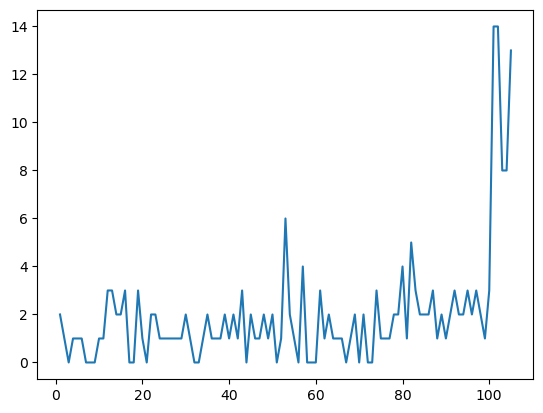

In [63]:
# Define ids
ids = range(1, len(unk_counts)+1)

# Plot the ids and unknown token counts
plt.plot(ids, unk_counts)

Notice that there is a spike in the later entries. You can inspect these rows and see what might be the problem.

In [64]:
# print rows after id=100
for row in cur.execute("SELECT id,title FROM news_articles WHERE ID > 100"):
    print(row)

(101, 'L’appello di Renzi a Meloni: «Riporta a casa Ilaria Salis e ti applaudiremo». Sul palco della Leopolda il padre della ragazza')
(102, "Una nonna sul trattore, grano, ulivi e un omaggio floreale. Ecco l'8 marzo delle donne Coldiretti")
(103, 'Fuga di notizie: ma i magistrati fanno sempre il loro dovere?')
(104, 'Una folla oceanica di oltre 2 milioni di persone alla manifestazione pro Gaza')
(105, 'Ucraina Russia, le notizie sulla guerra di oggi | Zelensky a Istanbul incontra Erdogan: «Turchia pronta a ospitare colloqui di pace»')


As you can see, there's an input error here. Your model was trained only on English articles so it wasn't able to recognize any of the words used in these titles. With this insight, you can act on it so it will not negatively impact your application. You can find the news source and filter entries like this so it won't mistakenly go into your users' news application.

## Wrap Up

Great work completing this project. You've successfully applied all the steps of the Machine Learning Project lifecycle to a real-world project, from scoping to data to modeling to deployment. You tackled common challenges like fixing unbalanced train/dev/test splits, addressing labeling ambiguity, and deploying a model into production.

The Machine Learning Project Lifecycle is an iterative process and you might have found yourself jumping from one stage to another to produce better results for your project. Given your findings so far, you can summarize your recommendations to the product owner so they can successfully integrate ML into their news app. Here are some aspects you might like to take note of:

* How would you reduce label ambiguity when you ask human labellers to provide the ground truth?
* What is the highest accuracy you got with the prototype model and will it be sufficient for the application?
* What are the timeline and resources needed to carry out the next phase of the project?
* What modifications can you suggest to the app? For example, can an article appear across different categories?

We encourage you to share and discuss your findings on [the DLAI Forum](https://community.deeplearning.ai/c/course-q-a/machine-learning-engineering-for-production/mlep-learner-projects/224). You can post about anything from a good labeling strategy to a state-of-the-art model built for this kind of task. You can also apply what you learned here to a different dataset and showcase it as your personal project. We're excited to see what you build!

<br>
<br>

**Acknowledgement:**

The dataset used in this scenario is a revised version of the [Topic Labeled News Dataset](https://www.kaggle.com/datasets/kotartemiy/topic-labeled-news-dataset).